# Bank Customer Segmentation

# 1. Imports 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

plt.figure(dpi=500)
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 3200x2400 with 0 Axes>

# 2. Data Exploration

In [2]:
url = os.path.join("..", "data", "bank-marketing-data.csv")
df = pd.read_csv(url)
print(f"Shape of Data :{df.shape}")

Shape of Data :(8950, 18)


### 2.1 DataFrame

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df = df.set_index("CUST_ID")

#### 

### 2.2 Data Summary

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df[df["MINIMUM_PAYMENTS"].isnull()].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


### 2.3 Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

### 2.4 Duplicates Check

In [8]:
df.duplicated().any()

False

- There are not duplicates in the data 

In [9]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are 313 missing values 8950 observation in `MINIMUM_PAYMENTS`
- 1 missing value in the `CREDIT_LIMIT`  

#### 2.4.1.`MINIMUM_PAYMENTS`

In [10]:
df[df["MINIMUM_PAYMENTS"].isnull()].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


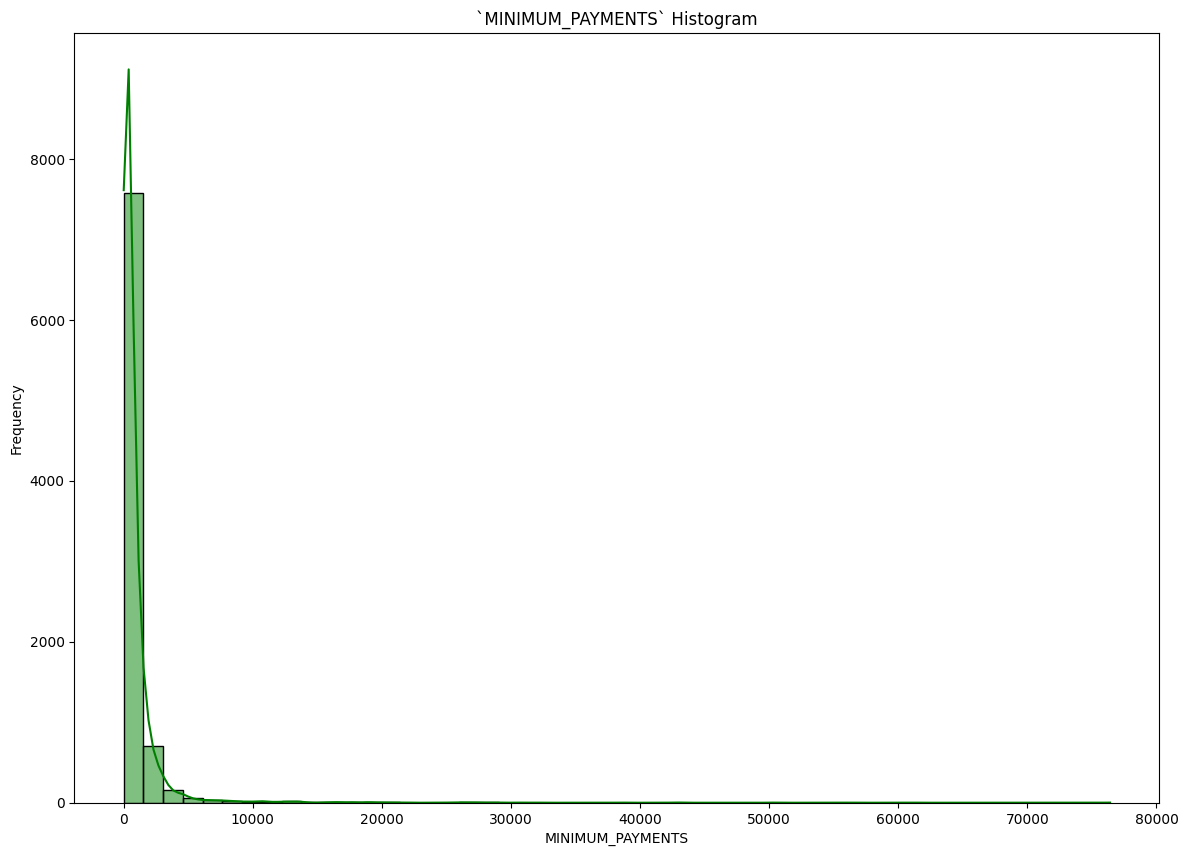

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.histplot(df['MINIMUM_PAYMENTS'], bins=50, alpha=0.5, color='g', kde=True)
plt.title('`MINIMUM_PAYMENTS` Histogram')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frequency')
plt.show()

In [12]:
df[df["CREDIT_LIMIT"].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
q_ = df['MINIMUM_PAYMENTS'].quantile(0.25)

This data in `MINIMUM_PAYMENTS` is left-skewed and there are missing values, we can consider filling the missing values with the minimum non-zero value of the column.

In [14]:
min_value = df['MINIMUM_PAYMENTS'].min()
df['MINIMUM_PAYMENTS'].fillna(min_value, inplace=True)

print("No of missing values in `CREDIT_LIMIT` : ", df["MINIMUM_PAYMENTS"].isnull().sum())

No of missing values in `CREDIT_LIMIT` :  0


#### 2.4.2.`CREDIT_LIMIT`

In [15]:
print("No of missing values in `CREDIT_LIMIT` : ", df["CREDIT_LIMIT"].isnull().sum())


No of missing values in `CREDIT_LIMIT` :  1


- There is only 1 value in the `CREDIT_LIMIT` out 0f 8950 observation. We can simply remove this observation from the data.

In [16]:
df = df.dropna(subset=['CREDIT_LIMIT'], axis=0)

print("No of missing values in `CREDIT_LIMIT` : ", df["CREDIT_LIMIT"].isnull().sum())
print(f"Shape of Data :{df.shape}")

No of missing values in `CREDIT_LIMIT` :  0
Shape of Data :(8949, 17)


### 2.5 Correlation 

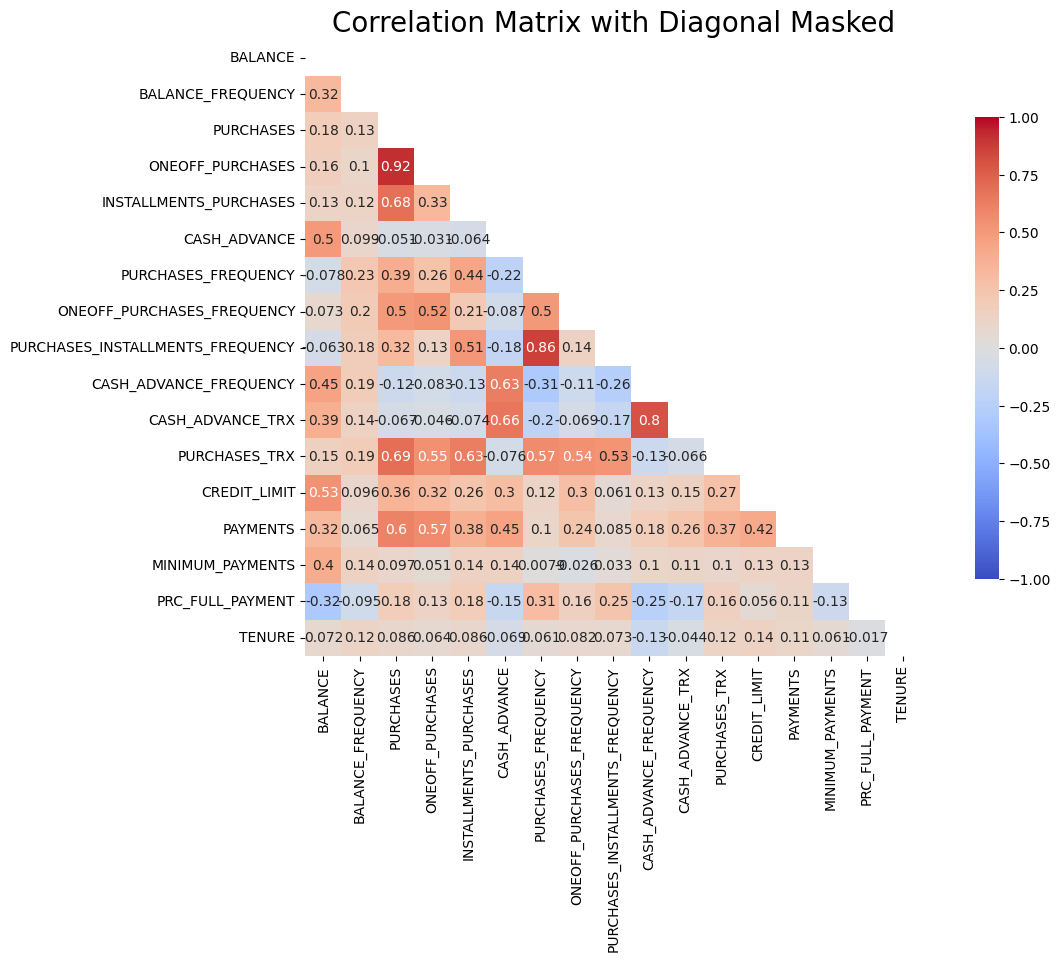

In [17]:
plt.figure(figsize=(14, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask, square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)


plt.title("Correlation Matrix with Diagonal Masked", fontsize=20)
plt.show()

# 3. Analyisis 

# 3.1 PCA 

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

In [19]:
pca = PCA()  
X_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PCA{i+1}' for i in range((len(df.columns)))] 
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-1.684484,-1.070217,-0.469997,0.686725,-0.056053,-0.080315,-0.817358,-0.006871,0.119547,0.078525,-0.236376,0.051641,0.082369,0.188378,-0.149238,0.048147,0.000160
1,-1.132568,2.510222,-0.603830,-0.104391,-0.701246,1.074137,0.391847,0.196580,0.667960,0.778227,-0.870268,0.610110,0.033135,0.731434,0.533417,-0.082876,-0.000003
2,0.968926,-0.383446,-0.086175,1.252350,2.160177,0.394581,1.522617,-0.258764,-0.859574,0.001632,-0.762395,-0.683279,-0.697248,-0.042265,-0.221157,0.511270,-0.000023
3,-0.897248,-0.017764,-1.526942,1.031341,-0.189525,0.198574,0.210129,-0.761288,-0.014698,-0.393904,0.748709,-0.101937,0.112596,0.413100,0.084170,-0.014561,0.000013
4,-1.600519,-0.681375,-0.340010,1.024973,0.436712,-0.078247,-0.691393,0.263664,0.575308,0.122481,-0.455140,0.110116,0.036774,0.041101,-0.291180,-0.070558,0.000081


In [20]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_


pca_summary = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Explained Variance': explained_var,
    'Cumulative Explained Variance': cumulative_var,
})

pca_summary.index = pd.RangeIndex(start=1, stop=len(explained_var) + 1, name='Principal Component')

pca_summary

,Eigenvalues,Explained Variance,Cumulative Explained Variance
Principal Component,,,
1,4.641399,2.729930e-01,0.272993
2,3.454852,2.032039e-01,0.476197
3,1.500345,8.824573e-02,0.564443
4,1.271731,7.479937e-02,0.639242
5,1.054981,6.205077e-02,0.701293
6,0.974672,5.732724e-02,0.758620
7,0.830031,4.881988e-02,0.807440
8,0.735091,4.323579e-02,0.850676
9,0.642875,3.781196e-02,0.888488


In [21]:
def get_img_path(img_name):
    file_path = os.path.join("..", "imgs", img_name)
    return file_path

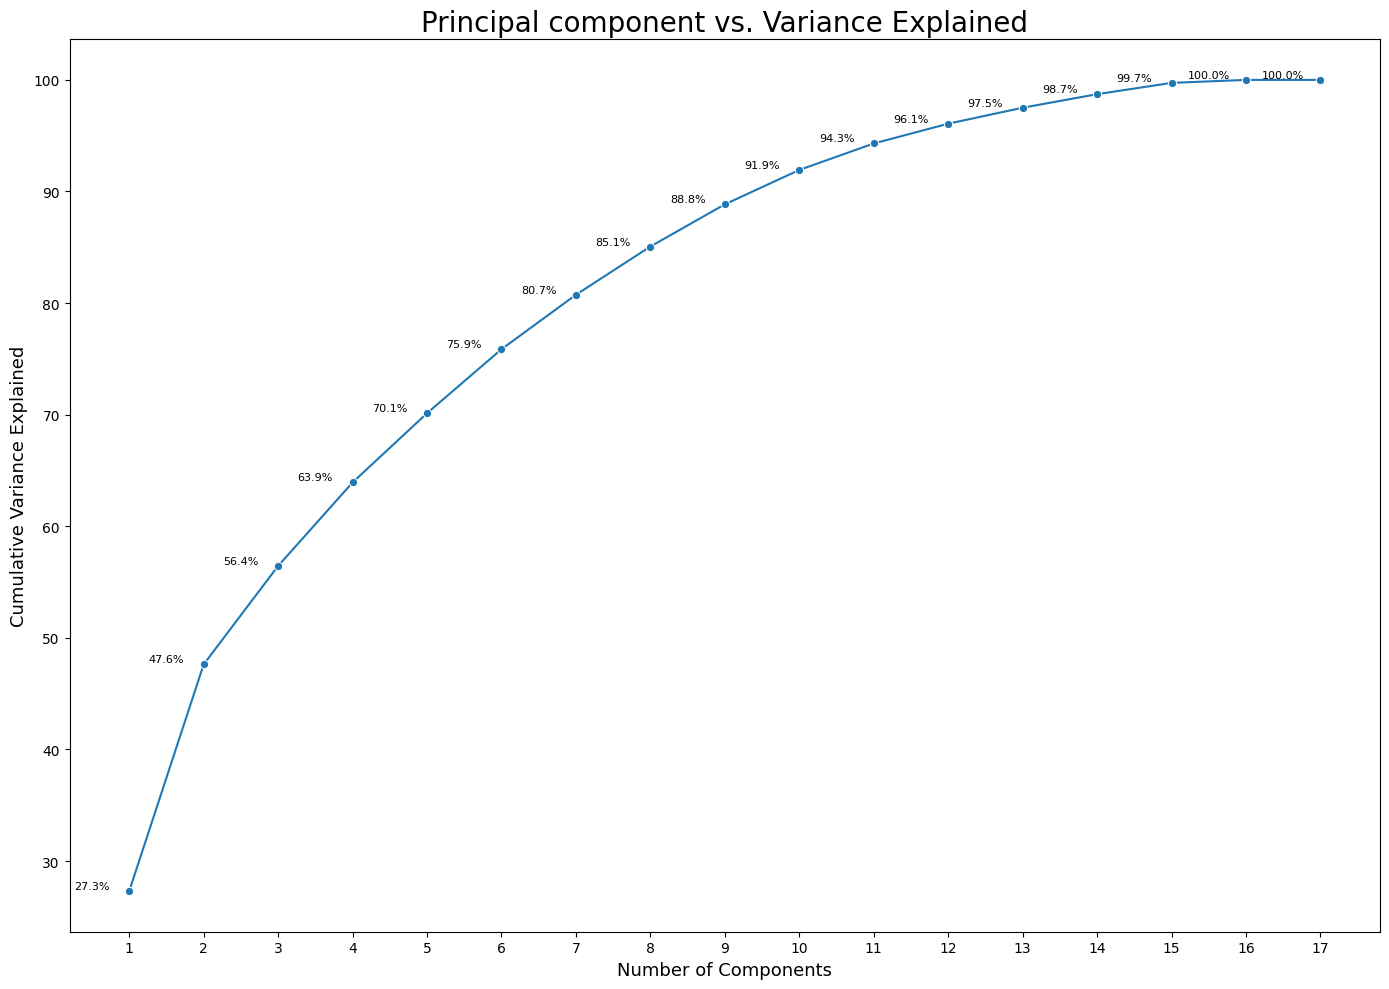

In [22]:
plt.figure(figsize=(14, 10))
sns.lineplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1), y=np.cumsum(pca.explained_variance_ratio_)*100, marker='o')

for i, percentage in enumerate(np.cumsum(pca.explained_variance_ratio_)*100):
    plt.text(i + 0.5, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Number of Components', fontsize = 13)
plt.ylabel('Cumulative Variance Explained', fontsize = 13)
plt.title('Principal component vs. Variance Explained', fontsize = 20)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))

img_path = get_img_path("pca_variance_explained.png")
plt.tight_layout()
plt.savefig(img_path, dpi = 700)
plt.show()

### **Feature Contribution to Principal Components:**

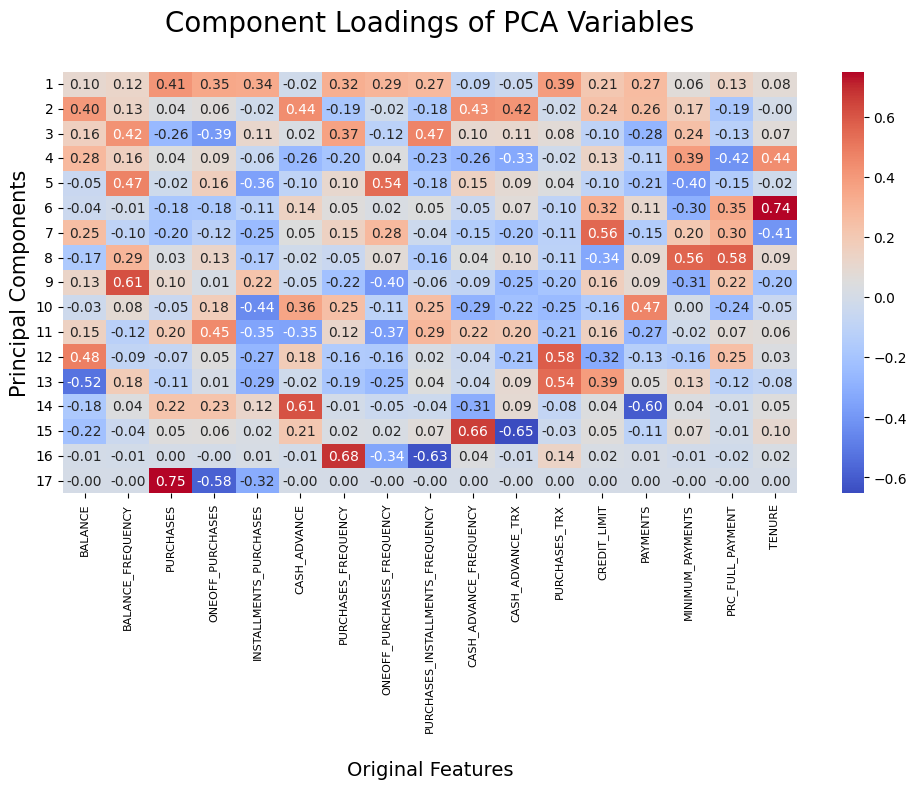

In [23]:
component_loadings = pca.components_

component_df = pd.DataFrame(component_loadings, columns=df.columns)

# Visualize component loadings using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(component_df, annot=True, cmap='coolwarm', fmt='.2f')

plt.yticks(ticks=np.arange(0.5, 
                           len(component_df), 1), 
           labels=np.arange(1, len(component_df) + 1, 1), 
           rotation=0)
plt.xticks(fontsize = 8, rotation=90)
plt.title('Component Loadings of PCA Variables\n', fontsize = 20)
plt.xlabel('\nOriginal Features', fontsize = 14)
plt.ylabel('Principal Components', fontsize = 15)

img_path = get_img_path("component_loading_pca.png")
plt.tight_layout()
plt.savefig(img_path, dpi = 700)
plt.show()

## Interpretation 
#### Feature Contribution to Principal Components:

- **Magnitude of Values:** The intensity of colors in the heatmap indicates the strength and direction of the relationship between the original features and the principal components.

- **High Positive/Negative Values:** Strong positive or negative values indicate a significant contribution of a particular feature to a principal component.

#### Patterns and Relationships:

- **Correlation between Features and Components:** You can observe which original features are more strongly associated with which principal components.

- **Groups or Clusters:** Patterns might emerge, indicating groups of features that are strongly related to specific principal components. This can imply underlying structures or dependencies within the data.

#### Dimension Reduction Insights:

- **Identifying Key Features:** Features with high loadings on a few principal components might represent key aspects of the data that capture most of its variation.

- **Dimension Reduction Possibility:** If certain features show low loadings across all components, it might suggest they are less critical or redundant for explaining the variance in the dataset.


## Viz of Data in 2D 

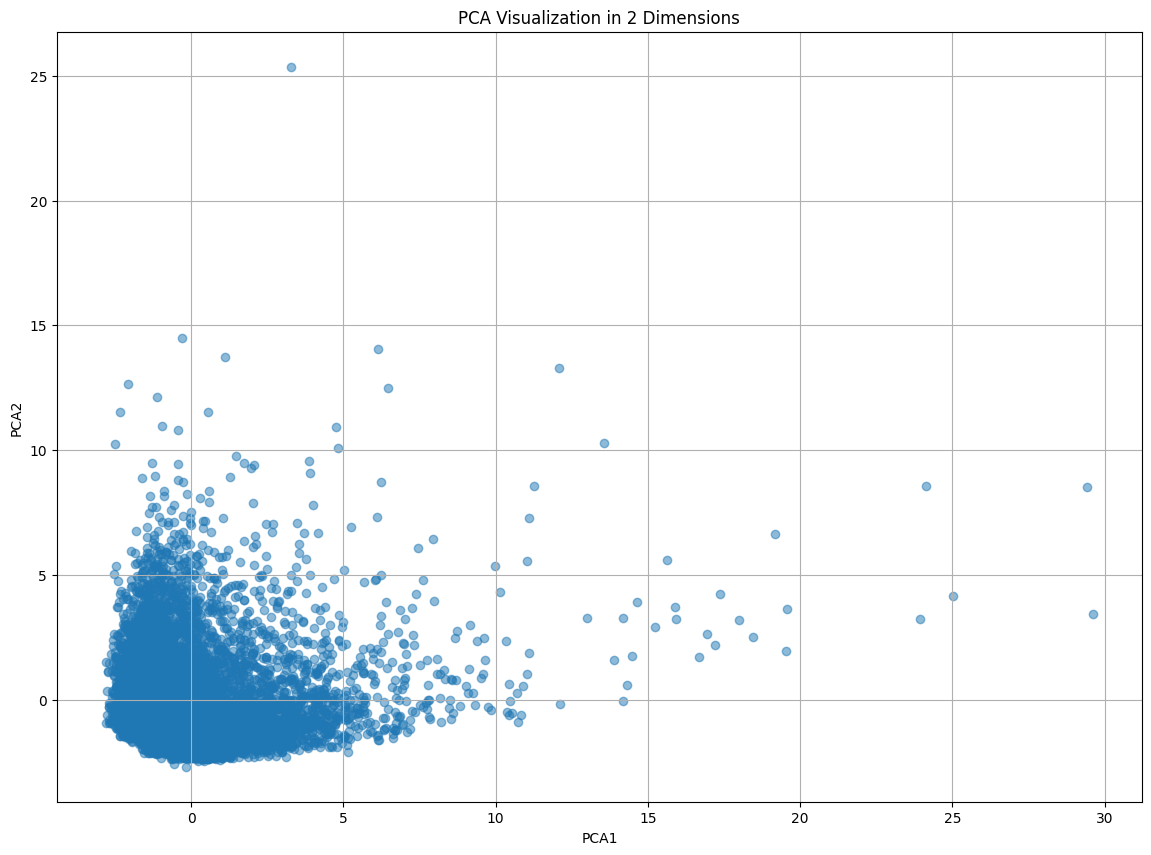

In [24]:
plt.figure(figsize=(14, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('PCA Visualization in 2 Dimensions')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

# 3.2 Factor Analysis

In [25]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

fa = FactorAnalyzer(rotation=None, n_factors=6)
fa.fit(df_scaled) 

ev, v = fa.get_eigenvalues()
eigen = pd.DataFrame(ev, columns=['eigenvalues'])
eigen

,eigenvalues
0,4.640880
1,3.454466
2,1.500177
3,1.271589
4,1.054863
5,0.974563
6,0.829938
7,0.735008
8,0.642803
9,0.523615


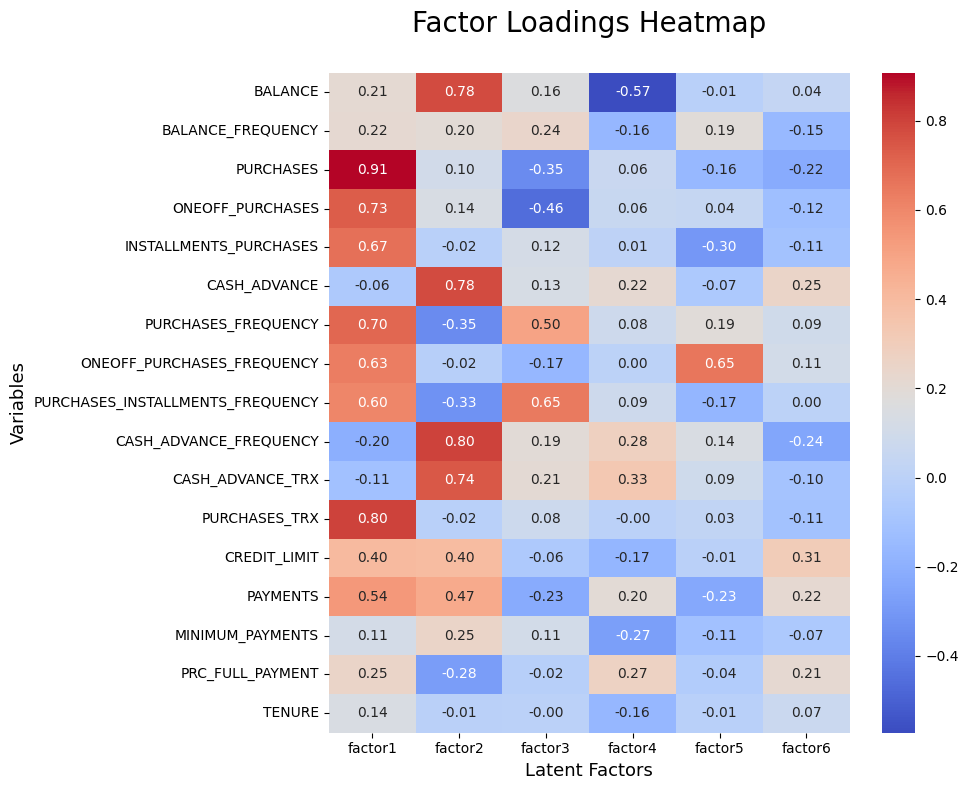

In [26]:
df_loadings = pd.DataFrame(fa.loadings_,
                           columns=['factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6']) 
df_loadings.set_index(df.columns, inplace=True)

plt.figure(figsize=(10, 8))  
sns.heatmap(df_loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Factor Loadings Heatmap\n', fontsize = 20)
plt.xlabel('Latent Factors', fontsize = 13)
plt.ylabel('Variables', fontsize = 13)


img_path = get_img_path("factor-loading.png")
plt.tight_layout()
plt.savefig(img_path, dpi = 700)

plt.show()

## 3.2.1 Factor Rotation 

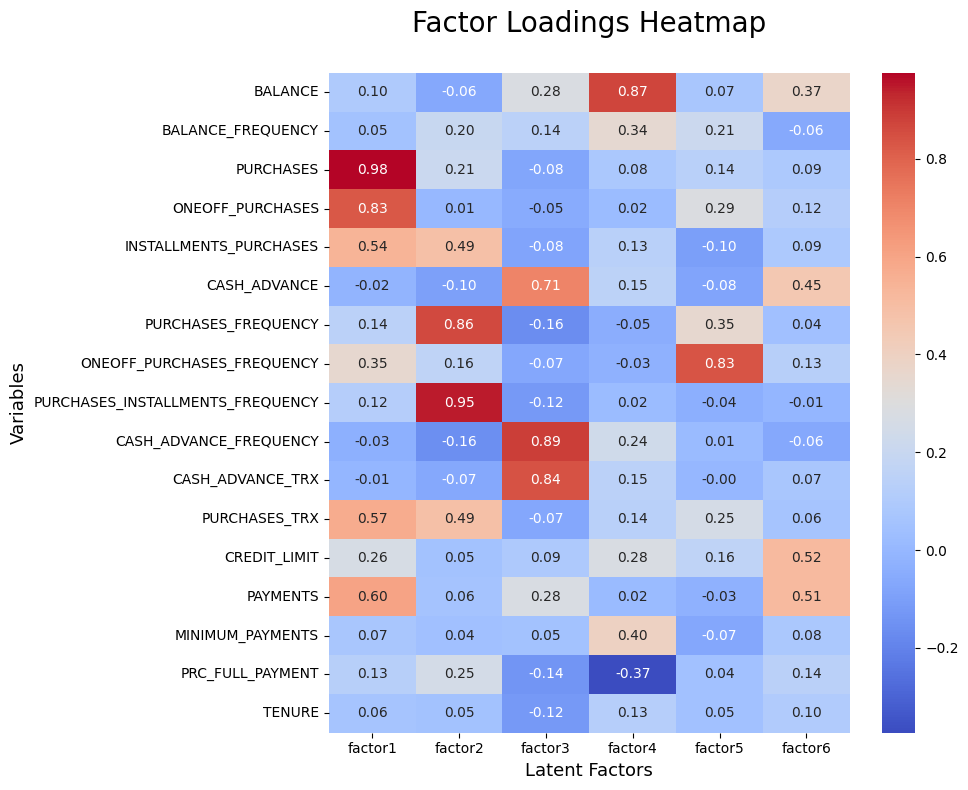

In [27]:
fa_rot = FactorAnalyzer(rotation='varimax', n_factors=6)
fa_rot.fit(df_scaled) 

df_loadings = pd.DataFrame(fa_rot.loadings_,
                           columns=['factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6']) 

df_loadings.set_index(df.columns, inplace=True)

plt.figure(figsize=(10, 8))  
sns.heatmap(df_loadings, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Factor Loadings Heatmap\n', fontsize = 20)
plt.xlabel('Latent Factors', fontsize = 13)
plt.ylabel('Variables', fontsize = 13)

img_path = get_img_path("factor-loading-after-roatation.png")
plt.tight_layout()
plt.savefig(img_path, dpi = 700)

plt.show()

## **Factor DataFrame**

In [28]:
factor_scores = fa.transform(df_scaled)
factor_columns = [f"F{i+1}" for i in range(6)]
factor_df = pd.DataFrame(factor_scores, columns=factor_columns)

print("Factor Scores DataFrame:")
factor_df.head()

Factor Scores DataFrame:


,F1,F2,F3,F4,F5,F6
0,-0.206672,-0.551629,-1.108781,0.006442,-1.022199,-1.078374
1,-0.635052,1.316760,-0.401035,0.111143,-0.721356,1.307338
2,0.407622,-0.249632,-0.337974,-1.085856,3.070861,1.283199
3,-0.324203,-0.025122,-1.224285,-0.413354,-0.357390,-0.337572
4,-0.473277,-0.364162,-1.018425,-0.519240,-0.497441,-0.562652


# Biplot

# 3.3 Clustering 
## KMeans

In [29]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_)

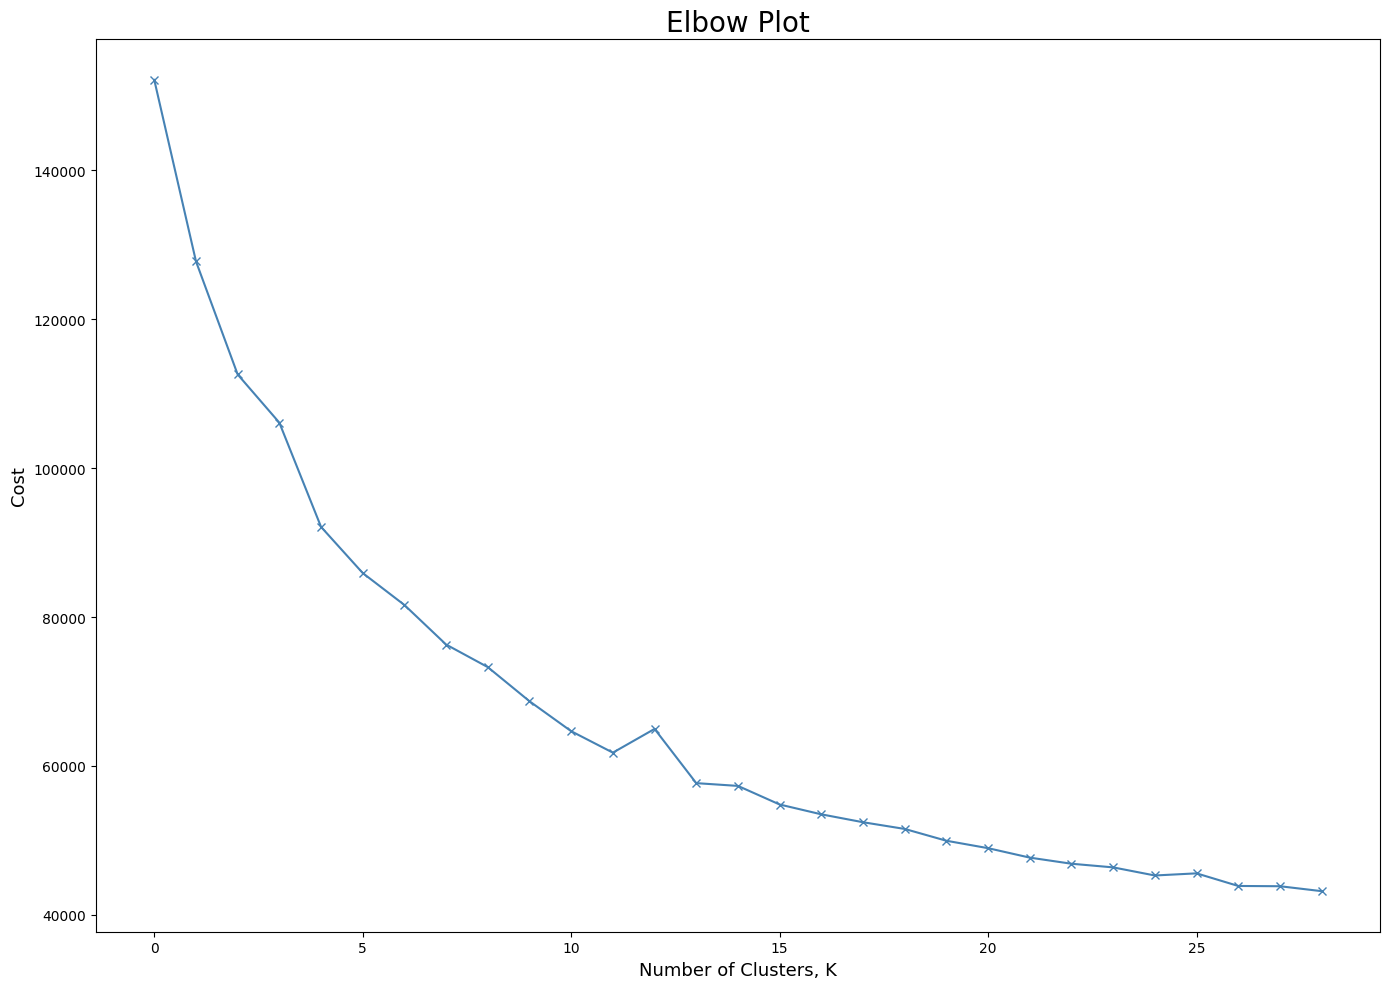

In [30]:
plt.figure(figsize=(14, 10))
plt.plot(cost, 'bx-', c = 'steelblue')

plt.title('Elbow Plot', fontsize = 20)
plt.ylabel('Cost', fontsize = 13)
plt.xlabel('Number of Clusters, K', fontsize = 13)

img_path = get_img_path("elbow-plot.png")
plt.tight_layout()
plt.savefig(img_path, dpi = 700)
plt.show()

- Selecting k = 4 clusters for further analysis

In [31]:
kmeans= KMeans(4, random_state = 0)
kmeans.fit(df_scaled)
labels=kmeans.labels_

inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
n_features_in = kmeans.n_features_in_

print(f"\nSum of Squared Distances to Closest Cluster Center (Inertia): {inertia:.1f}")
print("\nNumber of Iterations Run: ", n_iter)
print("\nNumber of Features Seen During Fit:", n_features_in)


Sum of Squared Distances to Closest Cluster Center (Inertia): 99048.3

Number of Iterations Run:  17

Number of Features Seen During Fit: 17


In [32]:
clusters_df = df.copy()
clusters_df['cluster_label'] = labels
clusters_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.019163,0.000000,12,1
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


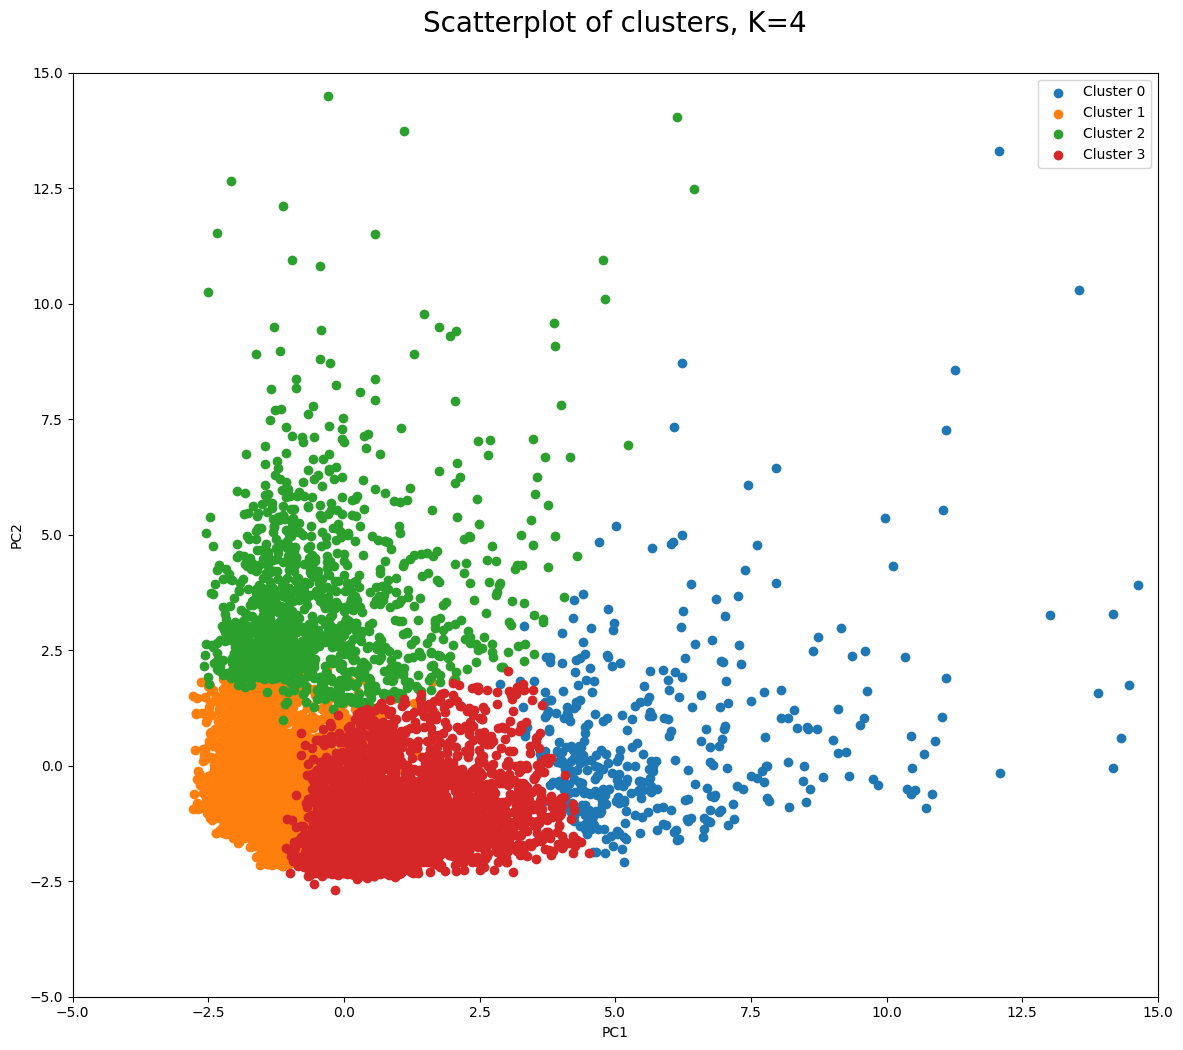

In [33]:
plt.figure(figsize=(14, 12))

clusters_df = pca_df[['PCA1', 'PCA2']]
clusters_df['cluster_label'] = labels
for cluster_name, cluster_data in clusters_df.groupby('cluster_label'):
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_name}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of clusters, K=4\n', fontsize = 20)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.legend()
plt.show()

# Biplot

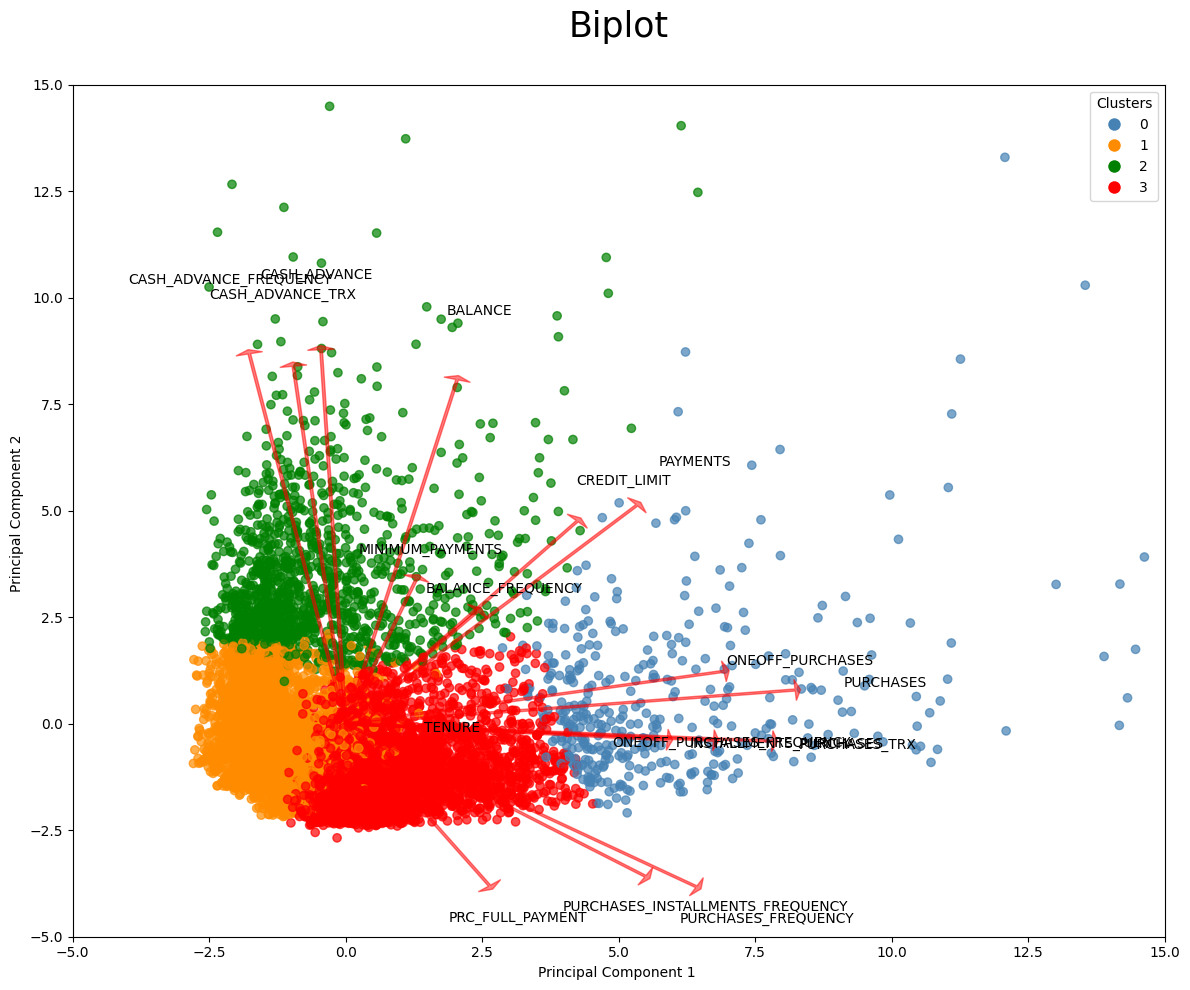

In [34]:
pca_result = pca.fit_transform(df_scaled)

def biplot(score, coeff, labels=None, scaling_factor=1.0):
    plt.figure(figsize=(12, 10))  
    coeff = np.transpose(coeff)

    custom_cmap = {0: 'steelblue', 1: 'darkorange', 2: 'green', 3: 'red'}
    cluster_colors = clusters_df['cluster_label'].map(custom_cmap)
    plt.scatter(score[:, 0], score[:, 1], alpha=0.7, c=cluster_colors)
    
    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0, i] * scaling_factor, coeff[1, i] * scaling_factor,
                  color='r', alpha=0.5, head_width=0.5, head_length=0.1,width = 0.05)
        if labels is not None:
            plt.text(coeff[0, i] * scaling_factor * 1.2, coeff[1, i] * scaling_factor * 1.2,
                     labels[i], color='k', ha='center', va='center',fontsize = 10)

    plt.xlabel(f'Principal Component 1 ')
    plt.ylabel(f'Principal Component 2 ')
    plt.title('Biplot\n', fontsize = 25)
    
    legend_handles = []
    for label, color in custom_cmap.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{label}', markerfacecolor=color, markersize=10))
    plt.legend(handles=legend_handles, title='Clusters', loc='best')
    
    plt.xlim(-5, 15)
    plt.ylim(-5, 15)
    
    img_path = get_img_path("biplot.png")
    plt.tight_layout()
    plt.savefig(img_path, dpi = 700)
    
    plt.show()
    
biplot(pca_result, np.transpose(pca.components_), labels=df.columns, scaling_factor=20.0)

# KMeans on PCA 

In [35]:
pc10_df = pca_df.iloc[:, :10]
pc10_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-1.684484,-1.070217,-0.469997,0.686725,-0.056053,-0.080315,-0.817358,-0.006871,0.119547,0.078525
1,-1.132568,2.510222,-0.603830,-0.104391,-0.701246,1.074137,0.391847,0.196580,0.667960,0.778227
2,0.968926,-0.383446,-0.086175,1.252350,2.160177,0.394581,1.522617,-0.258764,-0.859574,0.001632
3,-0.897248,-0.017764,-1.526942,1.031341,-0.189525,0.198574,0.210129,-0.761288,-0.014698,-0.393904
4,-1.600519,-0.681375,-0.340010,1.024973,0.436712,-0.078247,-0.691393,0.263664,0.575308,0.122481
...,...,...,...,...,...,...,...,...,...,...
8944,-0.363616,-2.011357,0.972365,-2.751539,-0.025599,-2.675851,1.584835,0.300969,1.338295,0.843490
8945,-0.590114,-1.696259,1.188659,-2.046311,0.239421,-3.267281,1.058988,-0.700933,0.967791,1.243780
8946,-0.929900,-1.806109,0.456199,-2.306577,-0.128611,-2.984803,1.422893,-0.278665,0.785603,0.828470
8947,-2.338056,-0.650937,-0.980592,-1.844275,0.171597,-3.185369,1.000218,0.259497,1.172735,-0.270258


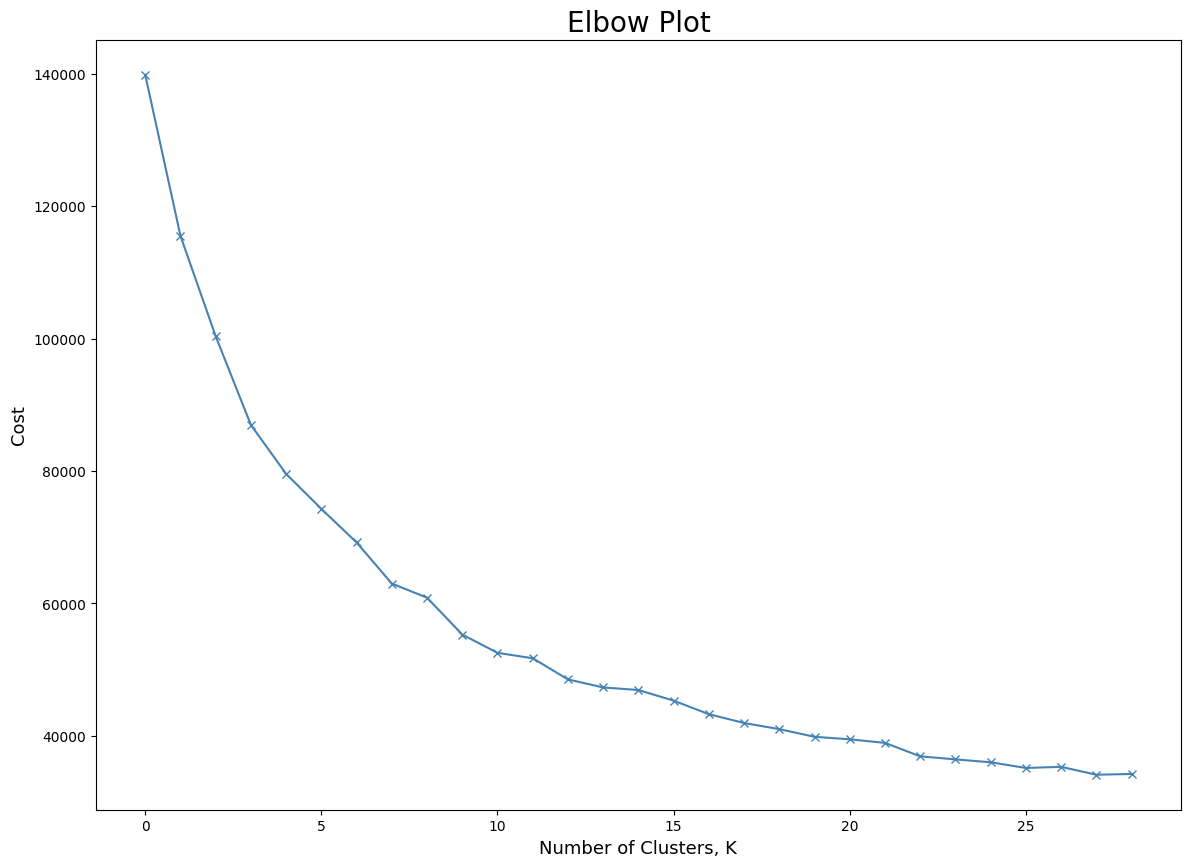

In [36]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(pc10_df)
    cost.append(kmean.inertia_)
    
plt.figure(figsize=(14, 10))
plt.plot(cost, 'bx-', c = 'steelblue')

plt.title('Elbow Plot', fontsize = 20)
plt.ylabel('Cost', fontsize = 13)
plt.xlabel('Number of Clusters, K', fontsize = 13)
plt.show()

In [37]:
kmeans= KMeans(4, random_state = 0)
kmeans.fit(df_scaled)
labels=kmeans.labels_

inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
n_features_in = kmeans.n_features_in_

print(f"\nSum of Squared Distances to Closest Cluster Center (Inertia): {inertia:.1f}")
print("\nNumber of Iterations Run: ", n_iter)
print("\nNumber of Features Seen During Fit:", n_features_in)


Sum of Squared Distances to Closest Cluster Center (Inertia): 99048.3

Number of Iterations Run:  17

Number of Features Seen During Fit: 17


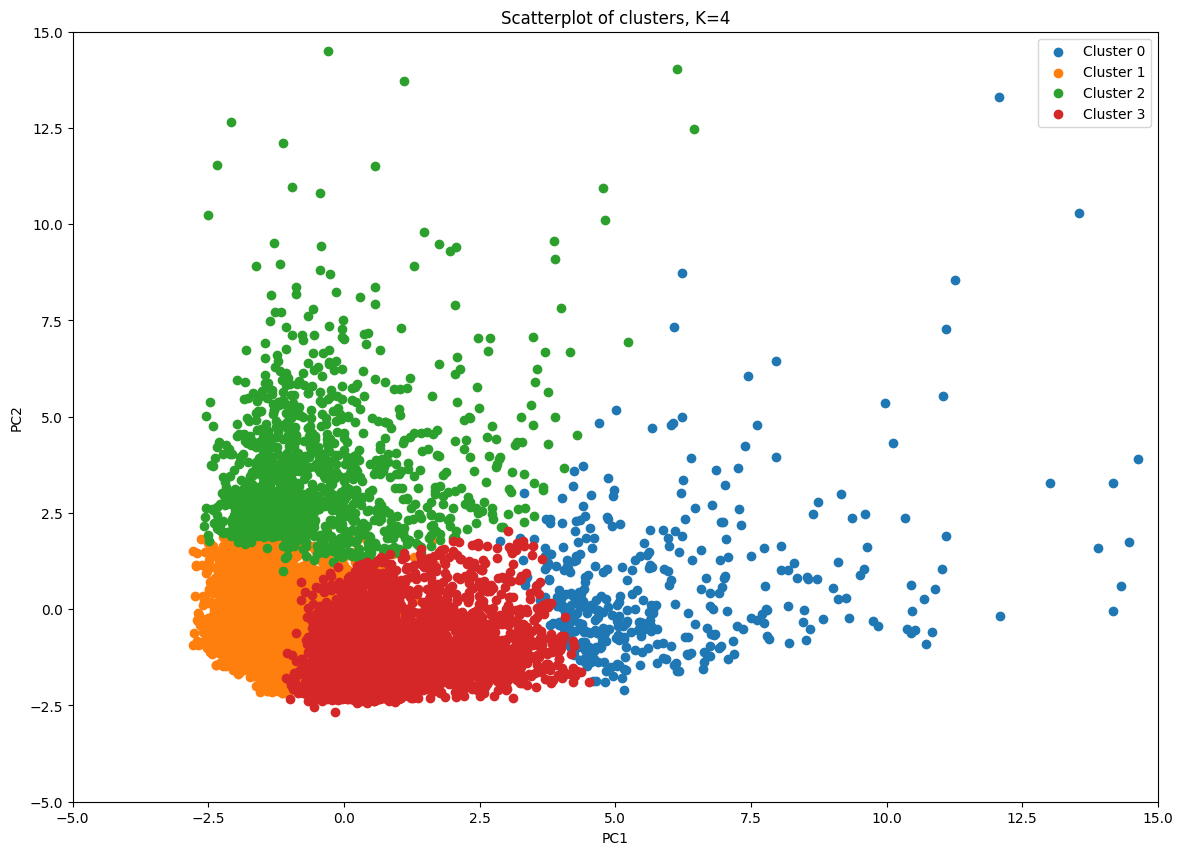

In [38]:
plt.figure(figsize=(14, 10))

clusters_df = pca_df[['PCA1', 'PCA2']]
clusters_df['cluster_label'] = labels
for cluster_name, cluster_data in clusters_df.groupby('cluster_label'):
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_name}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of clusters, K=4')
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.legend()
plt.show()

In [39]:
clusters_df = df.copy()
clusters_df['cluster_label'] = labels
clusters_df.T

CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010,...,C19181,C19182,C19183,C19184,C19185,C19186,C19187,C19188,C19189,C19190
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335,1809.828751,627.260806,1823.652743,1014.926473,152.225975,...,130.838554,5967.475270,40.829749,5.871712,193.571722,28.493517,19.183215,23.398673,13.457564,372.708075
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000,1.000000,1.000000,1.000000,1.000000,0.545455,...,1.000000,0.833333,1.000000,0.500000,0.833333,1.000000,1.000000,0.833333,0.833333,0.666667
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000,1333.280000,7091.010000,436.200000,861.490000,1281.600000,...,591.240000,214.550000,113.280000,20.900000,1012.730000,291.120000,300.000000,144.400000,0.000000,1093.250000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000,0.000000,6402.630000,0.000000,661.490000,1281.600000,...,0.000000,0.000000,0.000000,20.900000,1012.730000,0.000000,0.000000,0.000000,0.000000,1093.250000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000,1333.280000,688.380000,436.200000,200.000000,0.000000,...,591.240000,214.550000,113.280000,0.000000,0.000000,291.120000,300.000000,144.400000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8555.409326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.558778,127.040008
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333,0.666667,1.000000,1.000000,0.333333,0.166667,...,1.000000,0.833333,1.000000,0.166667,0.333333,1.000000,1.000000,0.833333,0.000000,0.666667
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333,0.000000,1.000000,0.000000,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000,0.583333,1.000000,1.000000,0.250000,0.000000,...,0.833333,0.666667,0.833333,0.000000,0.000000,0.833333,0.833333,0.666667,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333


# Hierachical Clustering 

**1. Single Linkage**

In [40]:
model = AgglomerativeClustering(n_clusters=4, linkage='single')
clusters = model.fit_predict(df_scaled)

clusters_df_agg = df.copy()
clusters_df_agg['cluster_label'] = clusters
clusters_df_agg.cluster_label.value_counts()
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label')
cluster_counts.reset_index(drop=True)
cluster_counts

,Cluster Label,No of Observation
0,0,8946
3,1,1
1,2,1
2,3,1


In [41]:
clusters_df_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.019163,0.000000,12,0
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


**3. Complete Linkage**

In [42]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(df)

clusters_df_agg = df.copy()
clusters_df_agg['cluster_label'] = clusters
clusters_df_agg.cluster_label.value_counts()
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label')
cluster_counts.reset_index(drop=True)
cluster_counts

,Cluster Label,No of Observation
0,0,4931
2,1,315
1,2,3680
3,3,23


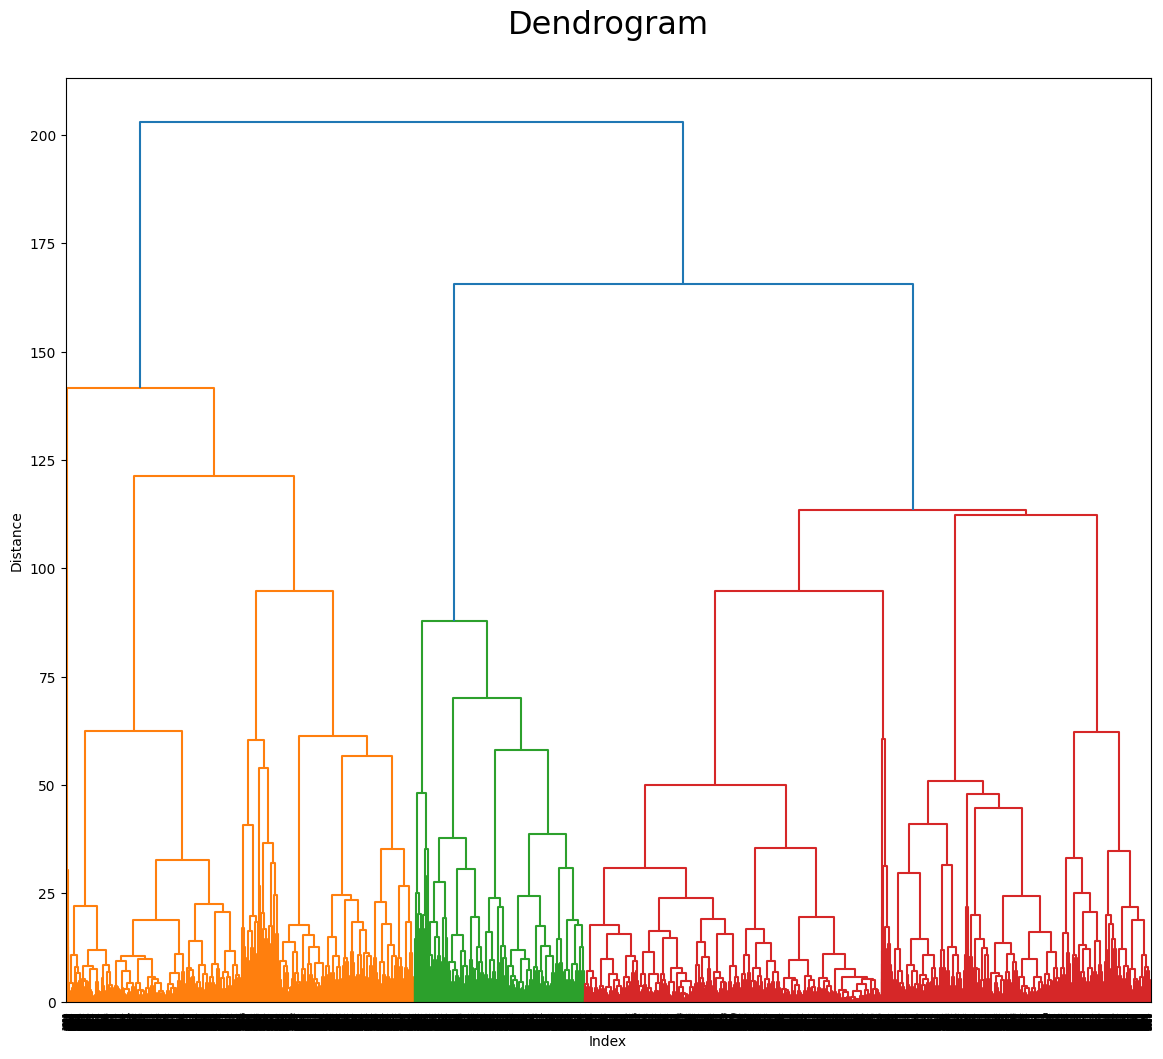

In [43]:
linkage_matrix = linkage(df_scaled, method='ward')

plt.figure(figsize=(14, 12))
dendrogram(linkage_matrix)
plt.title('Dendrogram\n', fontsize = 23)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [44]:
clusters_df_agg.T

CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010,...,C19181,C19182,C19183,C19184,C19185,C19186,C19187,C19188,C19189,C19190
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335,1809.828751,627.260806,1823.652743,1014.926473,152.225975,...,130.838554,5967.475270,40.829749,5.871712,193.571722,28.493517,19.183215,23.398673,13.457564,372.708075
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000,1.000000,1.000000,1.000000,1.000000,0.545455,...,1.000000,0.833333,1.000000,0.500000,0.833333,1.000000,1.000000,0.833333,0.833333,0.666667
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000,1333.280000,7091.010000,436.200000,861.490000,1281.600000,...,591.240000,214.550000,113.280000,20.900000,1012.730000,291.120000,300.000000,144.400000,0.000000,1093.250000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000,0.000000,6402.630000,0.000000,661.490000,1281.600000,...,0.000000,0.000000,0.000000,20.900000,1012.730000,0.000000,0.000000,0.000000,0.000000,1093.250000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000,1333.280000,688.380000,436.200000,200.000000,0.000000,...,591.240000,214.550000,113.280000,0.000000,0.000000,291.120000,300.000000,144.400000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8555.409326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.558778,127.040008
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333,0.666667,1.000000,1.000000,0.333333,0.166667,...,1.000000,0.833333,1.000000,0.166667,0.333333,1.000000,1.000000,0.833333,0.000000,0.666667
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333,0.000000,1.000000,0.000000,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000,0.583333,1.000000,1.000000,0.250000,0.000000,...,0.833333,0.666667,0.833333,0.000000,0.000000,0.833333,0.833333,0.666667,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333
